# Big Data Content Analytics - AUEB

## Comment Analysis

Importing libraries

In [529]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

from pandas import read_excel

In [530]:
df = pd.read_csv("/Users/sakis/Desktop/The_Dataset",sep="~")
df.head()

,Comment,Category
0,The device came back in a worse condition when...,Repair Experience/Availability
1,reply,Support Efficiency
2,"Your employees are always friendly. However, o...",Support Efficiency
3,Been told the correct information to start wit...,Information Provided
4,By having better service support someone who u...,Information Provided


The dataset consists of no null values.

In a basic description, the dataset consists of 27649 comments and each one of them belongs to a category. 
The dataset consists of no null values.

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27649 entries, 0 to 27648
Data columns (total 2 columns):
Comment     27649 non-null object
Category    27649 non-null object
dtypes: object(2)
memory usage: 432.1+ KB


Now let's have a look in the frequency of each category.

In [532]:
category_counts = Counter(df['Category'])
category_counts

Counter({'Repair Experience/Availability': 1508,
         'Support Efficiency': 5179,
         'Information Provided': 3550,
         'Warranty Coverage': 1185,
         'Product/Spares Quality': 2171,
         'Issue Resolution': 4931,
         'Agent Contact Skills': 2251,
         'Positive Verbatim': 1801,
         'Price': 291,
         'Promotion Conditions': 371,
         'Website / Store Experience': 1933,
         '3rd Party Complaint': 163,
         'Product /Spare Availability': 2080,
         'Other': 217,
         'issue Resolution': 1,
         'other': 9,
         'price': 1,
         'positive verbatim': 4,
         'issue resolution': 1,
         '3rd party complaint': 1,
         'promotion conditions': 1})

There seems to be a small problem with lower and upper case letters in the "Category" column, so we can fix this

In [533]:
df["Category"]= df["Category"].str.lower() 
category_counts = Counter(df['Category'])
category_counts

Counter({'repair experience/availability': 1508,
         'support efficiency': 5179,
         'information provided': 3550,
         'warranty coverage': 1185,
         'product/spares quality': 2171,
         'issue resolution': 4933,
         'agent contact skills': 2251,
         'positive verbatim': 1805,
         'price': 292,
         'promotion conditions': 372,
         'website / store experience': 1933,
         '3rd party complaint': 164,
         'product /spare availability': 2080,
         'other': 226})

4 of the 14 categories contain a small number of data compared to the other 10 categories. As a first attempt we will keep all the  14 categories and see how well the model responds.

In [534]:
top_categories = category_counts.most_common()[:14]


The comments will be the input for the model and the categories will be the output.

In [535]:
X = df['Comment']

In [536]:
y = df['Category']

In [537]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit


Now, it is time to split the dataset. We are going to split it in 3 components. One will be the training dataset, one the validation dataset and the last one the test dataset. StratifiedShuffleSplit shuffles the data, and then it splits the data into n_splits parts. After this step, StratifiedShuffleSplit picks one part to use as a test set. Then it repeats the same process n_splits - 1 other times, to get n_splits - 1 other test sets. So, it shuffles each time before splitting, and it splits n_splits times, and as a result the test sets can overlap.
At first, we will split the Original dataset into two pieces:Train-Validation dataset and Test dataset
Secondly, we will split the Train-Validation dataset into another two pieces:Train dataset and Validation dataset


In [538]:
test_sss = StratifiedShuffleSplit(n_splits=5,
                                  test_size=0.15,
                                  random_state=0)

In [539]:
val_sss = StratifiedShuffleSplit(n_splits=5, 
                                 test_size=0.2,
                                 random_state=0)

In [553]:
# splitting in train-val and test

X_train_val, X_test, y_train_val, y_test = None, None, None, None

# getting the indexes for each dataset
for train_index, test_index in test_sss.split(X, y):
    
    print("TRAIN-VAL:", train_index[:10], "TEST:", test_index[:10])
    
    X_train_val, X_test = X[train_index], X[test_index]
    y_train_val, y_test = y[train_index], y[test_index]

TRAIN-VAL: [11182 26603  5402 19283  4958 13033 14089 17947 16769 22549] TEST: [  965  8472  2900 16899 21028  7295  9330 15163 18261 13158]
TRAIN-VAL: [10891  2989 14097  1604 25741 27210 18279 27573 19270 25813] TEST: [22522  2019  2928 25894 23915  6173  1006 10908  3419  8492]
TRAIN-VAL: [14932  4745  3756 23747  9763  2042  6854 20209 25276 10632] TEST: [ 4121  6058 21694 24270 22672 18017  2431 10469  7970 10184]
TRAIN-VAL: [19319  9922  9506   926 12027 14964  9755 18183 26029 18840] TEST: [17411  7554  9493   903  4143  5853  7970  1470 13262 12268]
TRAIN-VAL: [15322 10351  8346 20231  3820  7030 26652  7393  5277 23560] TEST: [17395 19296 22747 23210  4664 20893  5433  9962 21681 20621]


In [554]:
X_train_val.head()  

15322    In this case, everything was fine, but I have ...
10351        No aftercare or loyalty towards its customers
8346     The very service from you has been excellent. ...
20231                               Employ qualified staff
3820                                 Answered the question
Name: Comment, dtype: object

We reset the indexes for both the X-train-val and y-train-val in order to break them 
again into two subsets.


In [555]:
X_train_val = X_train_val.reset_index(drop=True)
y_train_val = y_train_val.reset_index(drop=True)

We split again the train-val dataset into train and validation datasets

In [556]:

X_train, X_val, y_train, y_val = None, None, None, None

for train_index, val_index in val_sss.split(X_train_val, y_train_val):
    
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val = y_train_val[train_index], y_train_val[val_index] 

The next step is to encode the labels (categories) using a One-Hot Encoder. 
At first we run fit_transform on the Training dataand then we use the fitted One-hot-Encoder to transform the rest of the data



In [557]:
y_enc = OneHotEncoder(sparse=False)

y_train_enc = y_enc.fit_transform(y_train.values.reshape(-1, 1))

y_val_enc = y_enc.transform(y_val.values.reshape(-1, 1))
y_test_enc = y_enc.transform(y_test.values.reshape(-1, 1))


After constructing the three datasets we can see their shape. The training dataset consists of 18800 rows, while the test and validation datasets consist of 4148 and 4701 rows.

In [558]:

print('y_train shape: {}'.format(y_train_enc.shape))
print('y_val shape: {}'.format(y_val_enc.shape))
print('y_test shape: {}'.format(y_test_enc.shape))


y_train shape: (18800, 14)
y_val shape: (4701, 14)
y_test shape: (4148, 14)


### Bag of Words Approach (BoW)


A bag-of-words model (BoW), is a way of extracting features from text for use in modeling. The approach is very simple and flexible, and can be used in thousands of ways for extracting features from documents. It is a representation of text that describes the occurrence of words within a document. It involves two things: A vocabulary of known words. and a measure of the presence of known words. The model is only concerned with whether known words occur in the document, not where in the document.

In [559]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [560]:
comments = df['Comment'].str.lower().str.replace('.', ' ')
comments.head()

0    the device came back in a worse condition when...
1                                                reply
2    your employees are always friendly  however, o...
3    been told the correct information to start wit...
4    by having better service support someone who u...
Name: Comment, dtype: object

We will concatenate all the comments into one text and split in into tokens. then we are going to find the most frequent of them. Below we can see the 15 most frequent words in all the comments and how many times each one of them appears in the dataset.

In [561]:
all_words = " ".join(comments)
top_words = Counter(all_words.split()).most_common()
top_words[:15]

[('the', 41566),
 ('i', 21916),
 ('to', 21045),
 ('a', 18517),
 ('not', 15027),
 ('and', 14717),
 ('was', 11984),
 ('of', 9739),
 ('for', 9139),
 ('that', 8932),
 ('my', 8489),
 ('have', 8400),
 ('it', 8243),
 ('is', 7948),
 ('in', 7900)]

When we deal with text problems, stop words removal process is a one of the most important steps in order to have a better input for the models. The term stop words means that they are very common words in a language. these words do not help on most of the problems such as semantic analysis, classification etc. For that, we will print the top 100 most common words in order to pick those that we want to include in our Stop Words List. 

In [562]:
print(sorted([i[0].lower() for i in top_words[:100]]))

['-', '2', 'a', 'about', 'after', 'again', 'all', 'also', 'an', 'and', 'answer', 'are', 'as', 'at', 'back', 'be', 'because', 'been', 'better', 'but', 'buy', 'by', 'can', 'contact', 'could', 'customer', 'device', 'did', 'do', 'even', 'first', 'for', 'from', 'get', 'good', 'had', 'has', 'have', 'help', 'i', 'if', 'in', 'information', 'is', 'it', 'just', 'machine', 'me', 'more', 'my', 'new', 'no', 'not', 'nothing', 'now', 'of', 'on', 'one', 'only', 'or', 'order', 'out', 'part', 'parts', 'philips', 'problem', 'product', 'products', 'question', 'received', 'repair', 'replacement', 'send', 'sent', 'service', 'should', 'so', 'spare', 'still', 'that', 'the', 'then', 'there', 'they', 'this', 'time', 'to', 'very', 'warranty', 'was', 'we', 'were', 'what', 'when', 'which', 'will', 'with', 'would', 'you', 'your']


Our stop list will contain most of the words above. In fact we will exclude words that may be important for the model, such as "good" or "problem". The final list contains the words:

In [563]:
el_stop = ['-', '2', 'a', 'about', 'after', 'again', 'all', 'also', 'an', 'and',
           'are', 'as', 'at', 'back', 'be', 'because', 'been',
           'buy', 'by', 'can', 'could', 'customer', 
           'did', 'do', 'even', 'first', 'for', 'from', 'get', 'had', 
           'has', 'have', 'i', 'if', 'in', 'is', 'it',
           'just', 'me', 'more', 'my', 'new', 'no', 'now', 'of', 
           'on', 'one', 'only', 'or', 'out', 'part', 'parts',
           'send', 'sent', 'service', 'should', 'so', 
           'still', 'than', 'that', 'the', 'then', 'there', 'they', 'this', 'time', 
           'to', 'very', 'was', 'we', 'were', 'what', 'when', 'which', 
           'will', 'with', 'would', 'you', 'your']


We will set the total number of words used for vectorization to 3000. "comments_vect_counts" vectorizer will give the number of appearances of each word and "comments_vect_binary" vectorizer will return 1 if the word appears and 0 if the word doesn't appear.
 


In [564]:
max_words = 3000

comments_vect_counts = CountVectorizer(encoding='utf-8',
                                     strip_accents='unicode',
                                     lowercase=True,
                                     stop_words=el_stop,
                                     ngram_range=(1, 1), # unigrams
                                     max_features=max_words,
                                     binary=False # binary output or full counts. 
                                     )

comments_vect_binary = CountVectorizer(encoding='utf-8',
                                     strip_accents='unicode',
                                     lowercase=True,
                                     stop_words=el_stop,
                                     ngram_range=(1, 1), # unigrams
                                     max_features=max_words,
                                     binary=True # binary output or full counts. 
                                     )

In this step we fit the CountVectorizer only on the training dataset and use it to transform the Validation and Test sets.


In [565]:
X_train_enc = comments_vect_counts.fit_transform(X_train.astype(str))

X_val_enc = comments_vect_counts.transform(X_val.astype(str))


In [566]:
X_test_enc = comments_vect_counts.transform(X_test.astype(str))

In [567]:
X_train_enc


<18800x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 204881 stored elements in Compressed Sparse Row format>

### The model

In [568]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import pydot

Fist of all we set values to some variables that will be used for the model. We set Number of Classes for the Y labels to 14, number of epochs to 30, the batch_size of the data that will be fed to the Model when training to 32 and Dropout Rate of the Dropout Layer to 40%.


In [569]:
nb_classes = len(y_enc.categories_[0])
nb_epoch = 30
batch_size = 32 
dropout_rate = 0.4

We will create a sequential model. In sequential models each layer will use as input the output of the former layer added to the model.


In [570]:
model = Sequential()

model.add(Dense(512, input_shape=(max_words,)))

model.add(Activation('relu'))

model.add(Dropout(dropout_rate))

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(dropout_rate))

model.add(Dense(nb_classes))

model.add(Activation('softmax'))


We can see some information avout the models' layers

In [571]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               1536512   
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_28 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 14)                7182      
__________

In order to compile the model we will use categorical crossentropy as the loss function, Adam as an optimizer and  "accuracy" as ametric.

In [572]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy'
    ],
)

The model is now ready to be trained

In [573]:
history = model.fit(
    
    X_train_enc,           
    y_train_enc,            
    epochs=nb_epoch,        
    batch_size=batch_size,  
    verbose=2,              
    validation_data=(       
        X_val_enc,          
        y_val_enc
    ))

Train on 18800 samples, validate on 4701 samples
Epoch 1/30
 - 21s - loss: 1.5511 - acc: 0.5107 - val_loss: 1.1731 - val_acc: 0.6339
Epoch 2/30
 - 21s - loss: 0.8549 - acc: 0.7352 - val_loss: 1.0829 - val_acc: 0.6794
Epoch 3/30
 - 25s - loss: 0.5247 - acc: 0.8380 - val_loss: 1.1354 - val_acc: 0.6967
Epoch 4/30
 - 25s - loss: 0.3374 - acc: 0.8958 - val_loss: 1.2837 - val_acc: 0.7086
Epoch 5/30
 - 20s - loss: 0.2423 - acc: 0.9220 - val_loss: 1.4634 - val_acc: 0.7073
Epoch 6/30
 - 26s - loss: 0.1951 - acc: 0.9385 - val_loss: 1.5392 - val_acc: 0.7156
Epoch 7/30
 - 28s - loss: 0.1631 - acc: 0.9478 - val_loss: 1.6375 - val_acc: 0.7179
Epoch 8/30
 - 27s - loss: 0.1390 - acc: 0.9552 - val_loss: 1.7165 - val_acc: 0.7181
Epoch 9/30
 - 23s - loss: 0.1376 - acc: 0.9567 - val_loss: 1.7519 - val_acc: 0.7179
Epoch 10/30
 - 21s - loss: 0.1134 - acc: 0.9620 - val_loss: 1.8855 - val_acc: 0.7167
Epoch 11/30
 - 22s - loss: 0.1142 - acc: 0.9626 - val_loss: 1.9651 - val_acc: 0.7158
Epoch 12/30
 - 22s - loss

The model has Test accuracy: 71.8 %

In [574]:
score = model.evaluate(
    X_test_enc.todense(),    
    y_test_enc,              
    batch_size=batch_size,  
    verbose=2  
)

print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


 - 1s - loss: 2.4880 - acc: 0.7177

Test categorical_crossentropy: 2.4880289996946328

Test accuracy: 71.770 %


### Predictions

Let's now use our model to make some predictions. We will try to predict three new comments 

In [575]:
input_comment = """
you should treat your customers with more respect
"""

In [576]:
# custom prediction function 
def get_one_hot_predictions(pred_probs):
    """
    """
    max_probs = np.max(pred_probs, axis=1)
    
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

In [577]:
# vectorizing comment with Count Vectorizer
comments_vect = comments_vect_counts.transform([input_comment])

print(comments_vect.shape, end='\n\n')

comments_pred = model.predict_proba(comments_vect)

print('Probabilities', end='\n\n')
print(comments_pred, end='\n\n')


comments_pred_hot = get_one_hot_predictions(comments_pred)

print('Probabilities One Hot Vector', end='\n\n')
print(comments_pred_hot, end='\n\n')

print('Category Prediction:', end='\n\n')
print(y_enc.inverse_transform(comments_pred_hot)[0][0])

(1, 3000)

Probabilities

[[4.1372428e-10 9.9999452e-01 1.5184988e-09 5.7125897e-07 1.5262546e-09
  5.7123306e-10 1.9004082e-12 1.6653329e-08 5.0581617e-10 2.5160036e-09
  4.2885118e-09 4.4477920e-06 4.6128474e-07 6.7064701e-11]]

Probabilities One Hot Vector

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Category Prediction:

agent contact skills


In [578]:
input_comment = """
my coffee machine was not working properly. you need to replace it

"""

In [579]:
# vectorizing comment with Count Vectorizer
comments_vect = comments_vect_counts.transform([input_comment])

print(comments_vect.shape, end='\n\n')

comments_pred = model.predict_proba(comments_vect)

print('Probabilities', end='\n\n')
print(comments_pred, end='\n\n')


comments_pred_hot = get_one_hot_predictions(comments_pred)

print('Probabilities One Hot Vector', end='\n\n')
print(comments_pred_hot, end='\n\n')

print('Category Prediction:', end='\n\n')
print(y_enc.inverse_transform(comments_pred_hot)[0][0])

(1, 3000)

Probabilities

[[1.08060985e-05 3.05789965e-03 1.42097424e-05 3.09220292e-02
  1.12395275e-08 7.74311744e-08 7.66576704e-07 4.08184064e-07
  6.28395146e-03 1.06615907e-07 9.56537485e-01 6.64021354e-05
  3.10561177e-03 3.85564135e-07]]

Probabilities One Hot Vector

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Category Prediction:

repair experience/availability


In [580]:
input_comment = """
i had to repeat myself many times because the person i talked to did not understand what i was saying"""

In [581]:
comments_vect = comments_vect_counts.transform([input_comment])

print(comments_vect.shape, end='\n\n')

comments_pred = model.predict_proba(comments_vect)

print('Probabilities', end='\n\n')
print(comments_pred, end='\n\n')


comments_pred_hot = get_one_hot_predictions(comments_pred)

print('Probabilities One Hot Vector', end='\n\n')
print(comments_pred_hot, end='\n\n')

print('Category Prediction:', end='\n\n')
print(y_enc.inverse_transform(comments_pred_hot)[0][0])

(1, 3000)

Probabilities

[[2.1227572e-23 1.0000000e+00 9.5456706e-16 1.2190211e-14 6.3739779e-20
  7.1798800e-23 6.3934479e-31 1.2849871e-28 1.1068276e-22 1.0927493e-20
  1.6640387e-21 1.5443495e-11 3.8207392e-20 1.0156860e-22]]

Probabilities One Hot Vector

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Category Prediction:

agent contact skills


In [582]:
input_comment = """
i had to sent three e mails before you answer"""

In [583]:
comments_vect = comments_vect_counts.transform([input_comment])

print(comments_vect.shape, end='\n\n')

comments_pred = model.predict_proba(comments_vect)

print('Probabilities', end='\n\n')
print(comments_pred, end='\n\n')


comments_pred_hot = get_one_hot_predictions(comments_pred)

print('Probabilities One Hot Vector', end='\n\n')
print(comments_pred_hot, end='\n\n')

print('Category Prediction:', end='\n\n')
print(y_enc.inverse_transform(comments_pred_hot)[0][0])

(1, 3000)

Probabilities

[[1.5219781e-06 1.3308025e-06 5.6791550e-04 1.2347540e-01 7.9709984e-08
  1.1645097e-08 1.0713366e-08 3.5328159e-07 9.8672864e-08 2.1105610e-07
  3.9517940e-06 8.7542099e-01 9.1988838e-08 5.2794430e-04]]

Probabilities One Hot Vector

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Category Prediction:

support efficiency


As we can see the model makes accurate predictions.

In [584]:
plot_model(model,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)

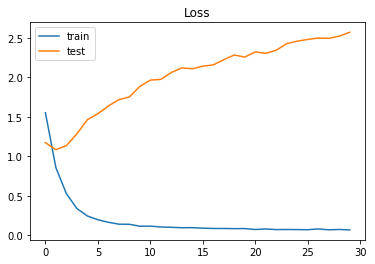

In [585]:

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();



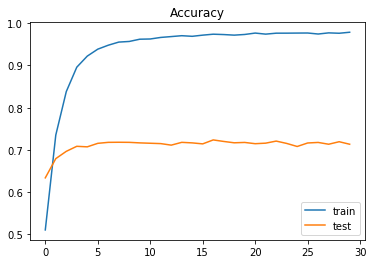

In [586]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

## LSTM model

In [601]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 256
# This is fixed.
EMBEDDING_DIM = 100

In [602]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [603]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Comment'].values)
word_index = tokenizer.word_index

In [604]:
X = tokenizer.texts_to_sequences(df['Comment'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (27649, 256)


In [605]:
Y = pd.get_dummies(df['Category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (27649, 14)


In [606]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24884, 256) (24884, 14)
(2765, 256) (2765, 14)


In [608]:
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(14, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64
history = model1.fit(X_train, Y_train, 
                    epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 22395 samples, validate on 2489 samples
Epoch 1/10
22395/22395 [==============================] - 244s 11ms/sample - loss: 2.0465 - acc: 0.3093 - val_loss: 1.6104 - val_acc: 0.4669
Epoch 2/10
22395/22395 [==============================] - 251s 11ms/sample - loss: 1.4155 - acc: 0.5466 - val_loss: 1.3110 - val_acc: 0.5838
Epoch 3/10
22395/22395 [==============================] - 250s 11ms/sample - loss: 1.1139 - acc: 0.6519 - val_loss: 1.1926 - val_acc: 0.6235
Epoch 4/10
22395/22395 [==============================] - 232s 10ms/sample - loss: 0.9352 - acc: 0.7100 - val_loss: 1.1317 - val_acc: 0.6493
Epoch 5/10
22395/22395 [==============================] - 233s 10ms/sample - loss: 0.8114 - acc: 0.7479 - val_loss: 1.1093 - val_acc: 0.6593
Epoch 6/10
22395/22395 [==============================] - 260s 12ms/sample - loss: 0.7162 - acc: 0.7770 - val_loss: 1.1195 - val_acc: 0.6722
Epoch 7/10
22395/22395 [==============================] - 226s 10ms/sample - loss: 0.6429 - acc: 0.8029 -

In [609]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2765/2765 [==============================] - 8s 3ms/sample - loss: 1.1401 - acc: 0.7005
Test set
  Loss: 1.140
  Accuracy: 0.701


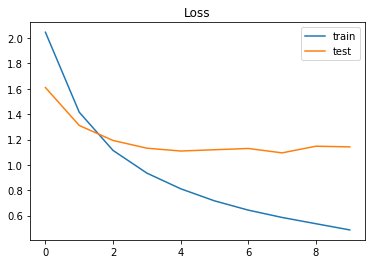

In [610]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

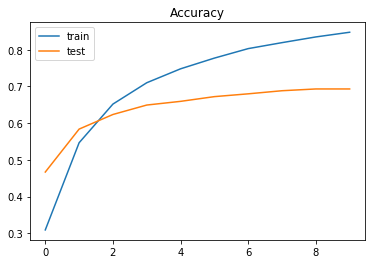

In [611]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

Predictions

In [630]:
new_comment = ['my coffee machine was not working properly. you need to replace it']
seq = tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model1.predict(padded)
labels =['Support Efficiency',
 'Issue Resolution',
 'Information Provided',
 'Agent Contact Skills',
 'Product/Spares Quality',
 'Product /Spare Availability',
 'Website / Store Experience',
 'Positive Verbatim',
 'Repair Experience/Availability',
 'Warranty Coverage',
 'Promotion Conditions',
 'Price',
 'Other',
 '3rd Party Complaint']
print(pred, labels[np.argmax(pred)])


[[6.6639640e-04 7.3233945e-03 2.5850653e-03 7.0894502e-02 7.9917477e-04
  4.2211083e-03 4.8996843e-03 5.4322148e-04 6.9051705e-02 1.2556273e-03
  7.0504373e-01 3.5854995e-03 1.2897779e-01 1.5323010e-04]] Promotion Conditions


In [631]:
new_comment = ['i had to repeat myself many times because the person i talked to did not understand what i was saying']
seq = tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model1.predict(padded)
labels = ['Support Efficiency',
 'Issue Resolution',`
 'Information Provided',
 'Agent Contact Skills',
 'Product/Spares Quality',
 'Product /Spare Availability',
 'Website / Store Experience',
 'Positive Verbatim',
 'Repair Experience/Availability',
 'Warranty Coverage',
 'Promotion Conditions',
 'Price',
 'Other',
 '3rd Party Complaint']
print(pred, labels[np.argmax(pred)])



[[6.7727224e-06 2.1452622e-01 3.0152979e-03 8.8720853e-03 3.5386157e-04
  4.4776723e-05 9.5371297e-07 1.2345353e-04 2.7440136e-04 9.8955439e-05
  3.6379346e-04 7.7218282e-01 7.5439944e-05 6.1159124e-05]] Price


In [632]:
new_comment = ['i had to sent three e mails before you answer']
seq = tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model1.predict(padded)
labels = ['Support Efficiency',
 'Issue Resolution',
 'Information Provided',
 'Agent Contact Skills',
 'Product/Spares Quality',
 'Product /Spare Availability',
 'Website / Store Experience',
 'Positive Verbatim',
 'Repair Experience/Availability',
 'Warranty Coverage',
 'Promotion Conditions',
 'Price',
 'Other',
 '3rd Party Complaint']
print(pred, labels[np.argmax(pred)])

[[1.9349070e-04 4.5520975e-03 1.2388278e-02 2.5764945e-01 5.0689857e-03
  1.3296983e-03 5.9247241e-06 6.3455204e-04 1.5692790e-04 8.5115136e-04
  1.4731176e-03 7.0488846e-01 1.8979459e-04 1.0618005e-02]] Price
